# Vectorized backtesting with `pandas`

## How to do it

### 1. Import the libraries

In [1]:
%matplotlib inline
import pandas as pd
import yfinance as yf
import numpy as np
import talib
import matplotlib as mpl

### 2. Download Apple’s stock prices from the years 2016-2021 and keep only the adjusted close price

In [2]:
df = yf.download("AAPL",
                 start="2016-01-01",
                 end="2021-12-31",
                 progress=False)
df = df[['Adj Close']]

### 3. Calculate the log returns and the 20-day SMA of the close prices

In [3]:
df['log_rtn'] = df['Adj Close'].apply(np.log).diff(1)
df['sma_20'] = df['Adj Close'].rolling(window=20).mean()
df

/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_45580/2315592251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_rtn'] = df['Adj Close'].apply(np.log).diff(1)
/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_45580/2315592251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma_20'] = df['Adj Close'].rolling(window=20).mean()


,Adj Close,log_rtn,sma_20
Date,,,
2016-01-04,24.041489,NaN,NaN
2016-01-05,23.439016,-0.025379,NaN
2016-01-06,22.980328,-0.019763,NaN
2016-01-07,22.010456,-0.043121,NaN
2016-01-08,22.126835,0.005274,NaN
...,...,...,...
2021-12-23,174.753891,0.003637,168.812785
2021-12-27,178.768860,0.022715,169.978604
2021-12-28,177.737839,-0.005784,170.922858


### 4. Create a position indicator

In [4]:
df['position'] = (df['Adj Close'] > df['sma_20']).astype(int)
df

/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_45580/1548585752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'] = (df['Adj Close'] > df['sma_20']).astype(int)


,Adj Close,log_rtn,sma_20,position
Date,,,,
2016-01-04,24.041489,NaN,NaN,0
2016-01-05,23.439016,-0.025379,NaN,0
2016-01-06,22.980328,-0.019763,NaN,0
2016-01-07,22.010456,-0.043121,NaN,0
2016-01-08,22.126835,0.005274,NaN,0
...,...,...,...,...
2021-12-23,174.753891,0.003637,168.812785,1
2021-12-27,178.768860,0.022715,169.978604,1
2021-12-28,177.737839,-0.005784,170.922858,1


In [5]:
# Using the following code, we count how many times we entered a long position
sum((df['position'] == 1) & (df['position'].shift() == 0))

56

### 5. Visualize the strategy over 2021

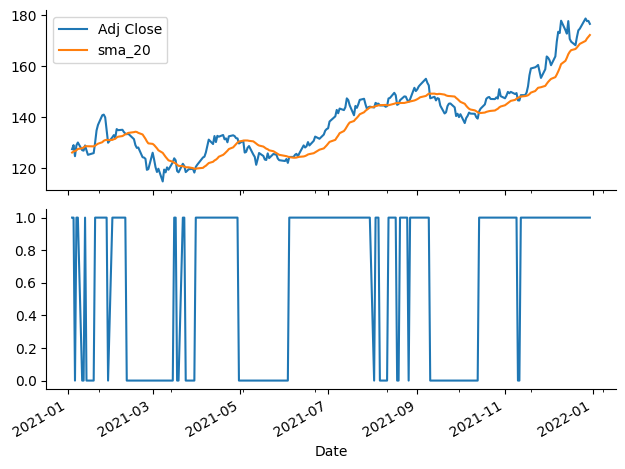

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, sharex=True)
df.loc["2021", ['Adj Close', 'sma_20']].plot(ax=ax[0])
df.loc["2021", "position"].plot(ax=ax[1])

sns.despine()
plt.tight_layout()

### 6. Calculate the strategy’s daily and cumulative returns

In [7]:
df['strategy_rtn'] = df['position'].shift(1) * df['log_rtn']
df['strategy_rtn_cum'] = df['strategy_rtn'].cumsum().apply(np.exp)
df

/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_45580/3576183638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strategy_rtn'] = df['position'].shift(1) * df['log_rtn']


,Adj Close,log_rtn,sma_20,position,strategy_rtn,strategy_rtn_cum
Date,,,,,,
2016-01-04,24.041489,NaN,NaN,0,NaN,NaN
2016-01-05,23.439016,-0.025379,NaN,0,-0.000000,1.000000
2016-01-06,22.980328,-0.019763,NaN,0,-0.000000,1.000000
2016-01-07,22.010456,-0.043121,NaN,0,-0.000000,1.000000
2016-01-08,22.126835,0.005274,NaN,0,0.000000,1.000000
...,...,...,...,...,...,...
2021-12-23,174.753891,0.003637,168.812785,1,0.003637,7.976124
2021-12-27,178.768860,0.022715,169.978604,1,0.022715,8.159375
2021-12-28,177.737839,-0.005784,170.922858,1,-0.005784,8.112317


### 7. Add the buy-and-hold strategy for comparison

In [8]:
df['bh_rtn_cum'] = df['log_rtn'].cumsum().apply(np.exp)

### 8. Plot the strategies’ cumulative returns

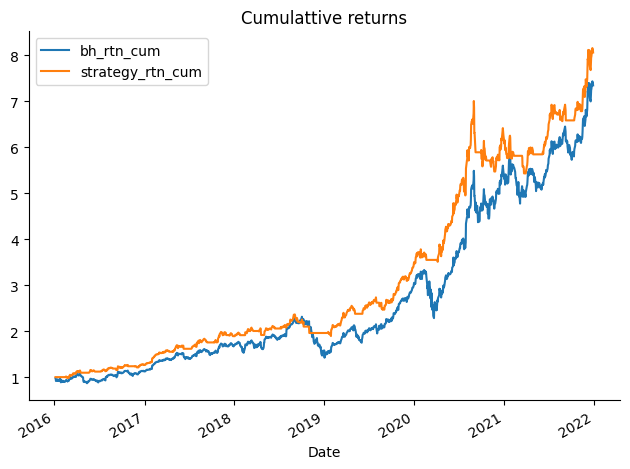

In [9]:
df[['bh_rtn_cum', 'strategy_rtn_cum']].plot(title="Cumulattive returns")

sns.despine()
plt.tight_layout()

## There's more

### 1. Calculate daily transaction costs

In [10]:
TRANSACTION_COST = 0.01
df['tc'] = df['position'].diff(1).abs() * TRANSACTION_COST

### 2. Calculate the strategy’s performance accounting for transaction costs.

In [11]:
df['strategy_rtn_cum_tc'] = (
    (df['strategy_rtn'] - df['tc']).cumsum().apply(np.exp)
)

### 3. Plot the cumulative returns of all the strategies

<Axes: title={'center': 'Cumulative returns'}, xlabel='Date'>

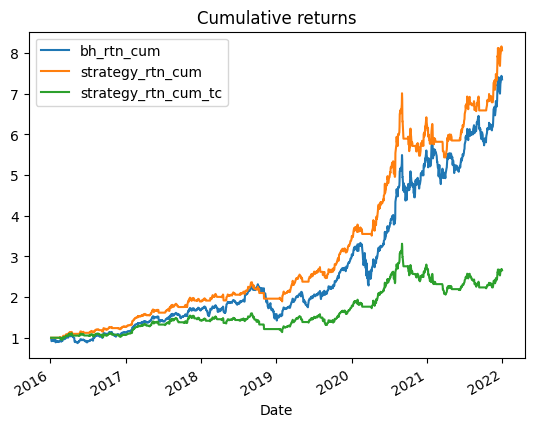

In [12]:
STRATEGY_COLS = ['bh_rtn_cum', 'strategy_rtn_cum', 'strategy_rtn_cum_tc']
(
    df
    .loc[:, STRATEGY_COLS]
    .plot(title="Cumulative returns")
)

# Event-driven backtesting with `backtrader`

## How to do it

### 1. Import the libraries

In [13]:
from datetime import datetime
import backtrader as bt
from backtrader_strategies.strategy_utils import *
import yfinance as yf

### 2. Download data from Yahoo Finance

In [14]:
# data = bt.feeds.YahooFinanceData(dataname="AAPL", 
#                                  fromdate=datetime(2021, 1, 1),
#                                  todate=datetime(2021, 12, 31))

In [15]:
data_yf = yf.download('AAPL', start='2021-01-01', end='2021-12-31')
data_yf.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.503624,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.080048,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.735039,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.991379,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.104767,105158200


In [16]:
class PandasData(bt.feeds.PandasData):
    lines = ('Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume')
    params = (
        ('Open', 0),
        ('High', 1),
        ('Low', 2),
        ('Close', 3),
        ('Adj Close', 4),
        ('Volume', 5),
    )


In [17]:
data = PandasData(dataname=data_yf)

### 3. Define the strategy

In [18]:
class SmaStrategy(bt.Strategy):
    params = (("ma_period", 20), )

    def __init__(self):
        # keep track of close price in the series
        self.data_close = self.datas[0].close

        # keep track of pending orders
        self.order = None

        # add a simple moving average indicator
        self.sma = bt.ind.SMA(self.datas[0], period=self.params.ma_period)
    
    def log(self, txt):
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f"{dt}: {txt}")
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order already submitted/accepted - no action required
            return
        
        # report executed order
        if order.status in [order.Completed]:

            direction = "b" if order.isbuy() else "s"
            log_str = get_action_log_string(
                dir=direction,
                action="e",
                price=order.executed.price,
                size=order.executed.size,
                cost=order.executed.value,
                commission=order.executed.comm
            )
            self.log(log_str)
        
        # report failed order
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Failed")

        # reset order -> no pending order
        self.order = None
    
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        self.log(
            get_result_log_string(gross=trade.pnl, net=trade.pnlcomm)
        )
    
    def next(self):
        # do nothing if an order is pending
        if self.order:
            return
        
        # check if there is already a position
        if not self.position:
            # buy condition
            if self.data_close[0] > self.sma[0]:
                self.log(
                    get_action_log_string("s", "c", self.data_close[0], 1)
                )
                self.order = self.buy()

        else:
            # sell condition
            if self.data_close[0] < self.sma[0]:
                self.log(
                    get_action_log_string("s", "c", self.data_close[0], 1)
                )
                self.order = self.sell()
    
    def start(self):
        print(f"Initial Portfolio Value: {self.broker.get_value():.2f}")
    
    def stop(self):
        print(f"Final Portfolio Value: {self.broker.get_value():.2f}")
    


### 4. Set up the backtest

In [19]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.addstrategy(SmaStrategy)
cerebro.addobserver(MyBuySell)
cerebro.addobserver(bt.observers.Value)


### 5. Run the backtest

In [20]:
cerebro.run()

Initial Portfolio Value: 1000.00
2021-02-01: SELL CREATED - Price: 134.14, Size: 1.00
2021-02-02: BUY EXECUTED - Price: 135.73, Size: 1.00, Cost: 135.73, Commission: 0.00
2021-02-11: SELL CREATED - Price: 135.13, Size: 1.00
2021-02-12: SELL EXECUTED - Price: 134.35, Size: -1.00, Cost: 135.73, Commission: 0.00
2021-02-12: OPERATION RESULT - Gross: -1.38, Net: -1.38
2021-03-16: SELL CREATED - Price: 125.57, Size: 1.00
2021-03-17: BUY EXECUTED - Price: 124.05, Size: 1.00, Cost: 124.05, Commission: 0.00
2021-03-18: SELL CREATED - Price: 120.53, Size: 1.00
2021-03-19: SELL EXECUTED - Price: 119.90, Size: -1.00, Cost: 124.05, Commission: 0.00
2021-03-19: OPERATION RESULT - Gross: -4.15, Net: -4.15
2021-03-22: SELL CREATED - Price: 123.39, Size: 1.00
2021-03-23: BUY EXECUTED - Price: 123.33, Size: 1.00, Cost: 123.33, Commission: 0.00
2021-03-24: SELL CREATED - Price: 120.09, Size: 1.00
2021-03-25: SELL EXECUTED - Price: 119.54, Size: -1.00, Cost: 123.33, Commission: 0.00
2021-03-25: OPERATION

### 6. Plot the results

<IPython.core.display.Javascript object>

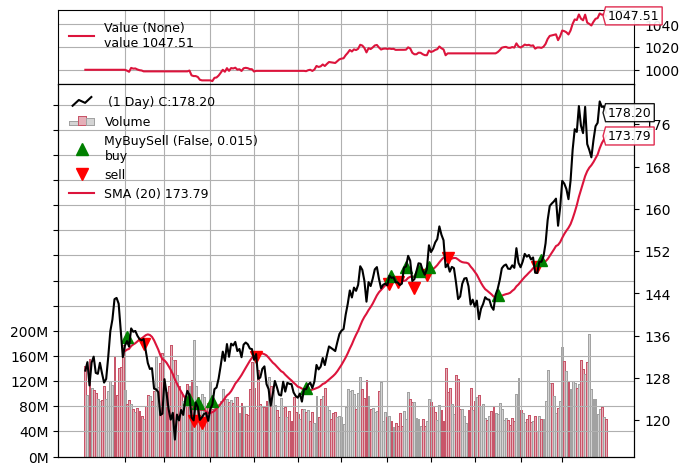

In [21]:
# plot 사용시 그래프 나타나지 않아서 a 변수 할당 후 [0][0] 인덱싱으로 그래프 출력
# cerebro.plot(iplot=False, volume=False)
# a = cerebro.plot(iplot=False, volume=False)
a = cerebro.plot()
a[0][0]

In [22]:
# resetting the matplotlib style
mpl.rcdefaults()

## There's more

In [23]:
# create a Cerebro entity
cerebro = bt.Cerebro(stdstats=False)

# set up the backtest
cerebro.adddata(data)
cerebro.optstrategy(SmaStrategy, ma_period=range(10, 31))
cerebro.broker.setcash(1000.0)
cerebro.run(maxcpus=1)

Initial Portfolio Value: 1000.00
2021-01-20: SELL CREATED - Price: 132.03, Size: 1.00
2021-01-21: BUY EXECUTED - Price: 133.80, Size: 1.00, Cost: 133.80, Commission: 0.00
2021-01-29: SELL CREATED - Price: 131.96, Size: 1.00
2021-02-01: SELL EXECUTED - Price: 133.75, Size: -1.00, Cost: 133.80, Commission: 0.00
2021-02-01: OPERATION RESULT - Gross: -0.05, Net: -0.05
2021-02-08: SELL CREATED - Price: 136.91, Size: 1.00
2021-02-09: BUY EXECUTED - Price: 136.62, Size: 1.00, Cost: 136.62, Commission: 0.00
2021-02-09: SELL CREATED - Price: 136.01, Size: 1.00
2021-02-10: SELL EXECUTED - Price: 136.48, Size: -1.00, Cost: 136.62, Commission: 0.00
2021-02-10: OPERATION RESULT - Gross: -0.14, Net: -0.14
2021-03-01: SELL CREATED - Price: 127.79, Size: 1.00
2021-03-02: BUY EXECUTED - Price: 128.41, Size: 1.00, Cost: 128.41, Commission: 0.00
2021-03-02: SELL CREATED - Price: 125.12, Size: 1.00
2021-03-03: SELL EXECUTED - Price: 124.81, Size: -1.00, Cost: 128.41, Commission: 0.00
2021-03-03: OPERATION

[[<backtrader.cerebro.OptReturn at 0x14791d2d0>],

In [24]:
# %reload_ext autoreload
# %autoreload 2
# from backtrader_strategies import sma_strategy_optimization

# Backtesting a long/short strategy based on the RSI

## How to do it

### 1. Import the libraries

In [25]:
from datetime import datetime
import backtrader as bt
from backtrader_strategies.strategy_utils import *

### 2. Define the signal strategy based on `bt.SignalStrategy`

In [26]:
class RsiSignalStrategy(bt.SignalStrategy):
    params = dict(rsi_periods=14, rsi_upper=70, rsi_lower=30, rsi_mid=50)

    def __init__(self):

        # add RSI indicator
        rsi = bt.indicators.RSI(period=self.params.rsi_periods,
                                upperband=self.params.rsi_upper,
                                lowerband=self.params.rsi_lower)
        
        # add RSI from TA-lib just for reference
        bt.talib.RSI(self.data, plotname='TA_RSI')

        # long condition (with exit)
        rsi_signal_long = bt.ind.CrossUp(rsi, self.params.rsi_lower, plot=False)
        self.signal_add(bt.SIGNAL_LONG, rsi_signal_long)
        self.signal_add(bt.SIGNAL_LONGEXIT, -(rsi > self.params.rsi_mid))

        # short condition (with exit)
        rsi_signal_short = -bt.ind.CrossDown(rsi, self.params.rsi_upper, plot=False)
        self.signal_add(bt.SIGNAL_SHORT, rsi_signal_short)
        self.signal_add(bt.SIGNAL_SHORTEXIT, rsi < self.params.rsi_mid)

### 3. Download data

In [27]:
import yfinance as yf

# data = bt.feeds.YahooFinanceData(dataname="META",
#                                  fromdate=datetime(2021, 1, 1),
#                                     todate=datetime(2021, 12, 31))


data_yf = yf.download("META", start="2021-01-01", end="2021-12-31")
data = PandasData(dataname=data_yf)

[*********************100%***********************]  1 of 1 completed


### 4. Set up and run the backtest

In [28]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.addstrategy(RsiSignalStrategy)
cerebro.adddata(data)
cerebro.addsizer(bt.sizers.SizerFix, stake=1)
cerebro.broker.setcash(1000.0)
cerebro.broker.setcommission(commission=0.001)
cerebro.addobserver(MyBuySell)
cerebro.addobserver(bt.observers.Value)

print(f"Starting Portfolio Value: {cerebro.broker.getvalue():.2f}")
cerebro.run()
print(f"Final Portfolio Value: {cerebro.broker.getvalue():.2f}")

Starting Portfolio Value: 1000.00
Final Portfolio Value: 1042.56


### 5. Plot the results

<IPython.core.display.Javascript object>

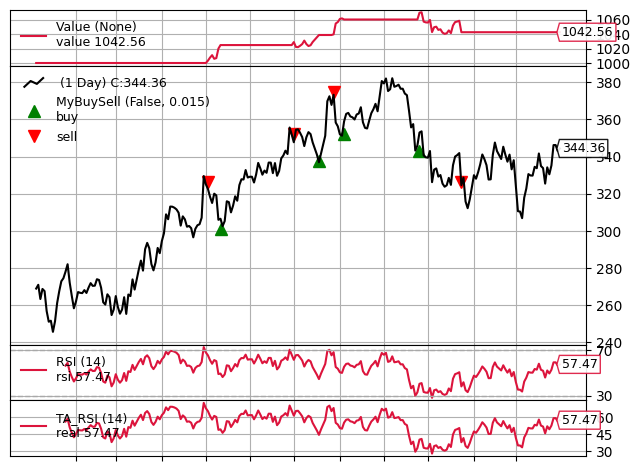

In [29]:
ax = cerebro.plot(iplot=True, volume=False)
ax[0][0]

## There's more

### 1. Go 'all-in' with the RSI strategy

In [30]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.addstrategy(RsiSignalStrategy)
cerebro.adddata(data)
cerebro.addsizer(bt.sizers.AllInSizer)
cerebro.broker.setcash(1000.0)
cerebro.broker.setcommission(commission=0.001)
cerebro.addobserver(bt.observers.Value)

print(f"Starting Portfolio Value: {cerebro.broker.getvalue():.2f}")
cerebro.run()
print(f"Final Portfolio Value: {cerebro.broker.getvalue():.2f}")

Starting Portfolio Value: 1000.00
Final Portfolio Value: 1183.95


### 2. Define a fixed commission scheme per share and run the backtest

In [31]:
class FixedCommisionShare(bt.CommInfoBase):
    """
    Scheme with fixed commission per share
    """

    params = (
        ('commission', 0.03),
        ('stocklike', True),
        ('commtype', bt.CommInfoBase.COMM_FIXED),
    )

    def _getcommission(self, size, price, pseudoexec):
        return abs(size) * self.params.commission

In [32]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.addstrategy(RsiSignalStrategy)
cerebro.adddata(data)
cerebro.addsizer(bt.sizers.AllInSizer)
cerebro.broker.setcash(1000.0)
cerebro.broker.addcommissioninfo(FixedCommisionShare())
cerebro.addobserver(bt.observers.Value)

print(f"Starting Portfolio Value: {cerebro.broker.getvalue():.2f}")
cerebro.run()
print(f"Final Portfolio Value: {cerebro.broker.getvalue():.2f}")

Starting Portfolio Value: 1000.00
Final Portfolio Value: 1189.94


### 3. Define a fixed commission scheme per order and run the backtest

In [33]:
class FixedCommissionOrder(bt.CommInfoBase):
    """
    Scheme with fixed commission per order    
    """
    params = (
        ('commission', 2.5),
        ('stocklike', True),
        ('commtype', bt.CommInfoBase.COMM_FIXED),
    )

    def _getcommission(self, size, price, pseudoexec):
        return self.params.commission

In [34]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.addstrategy(RsiSignalStrategy)
cerebro.adddata(data)
cerebro.addsizer(bt.sizers.AllInSizer)
cerebro.broker.setcash(1000.0)
cerebro.broker.addcommissioninfo(FixedCommissionOrder())
cerebro.addobserver(bt.observers.Value)

print(f"Starting Portfolio Value: {cerebro.broker.getvalue():.2f}")
cerebro.run()
print(f"Final Portfolio Value: {cerebro.broker.getvalue():.2f}")

Starting Portfolio Value: 1000.00
Final Portfolio Value: 1174.70


# Backtesting a buy/sell strategy based on Bollinger bands

## How to do it

### 1. Import the libraries

In [2]:
import backtrader as bt
import datetime
import pandas as pd
from backtrader_strategies.strategy_utils import *

In [16]:
%matplotlib inline
import pandas as pd
import yfinance as yf
import numpy as np
import talib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Define the strategy on the Bollinger bands

In [5]:
class BollingerBandStrategy(bt.Strategy):
    params = (("period", 20), ("devfactor", 2.0),)

    def __init__(self):
        # keep track of prices
        self.data_close = self.datas[0].close
        self.data_open = self.datas[0].open

        # keep track of pending orders
        self.order = None

        # add Bollinger Bands indicator and track the buy/sell signals
        self.b_band = bt.ind.BollingerBands(self.datas[0],
                                            period=self.params.period,
                                            devfactor=self.params.devfactor)
        self.buy_signal = bt.ind.CrossOver(self.datas[0],
                                           self.b_band.lines.bot,
                                           plotname="Buy Signal")
        self.sell_signal = bt.ind.CrossOver(self.datas[0],
                                            self.b_band.lines.top,
                                            plotname="Sell Signal")
    
    def log(self, txt):
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f"{dt}: {txt}")
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order already submitted/accepted - no action required
            return
        
        # report executed order
        if order.status in [order.Completed]:

            direction = "b" if order.isbuy() else "s"
            log_str = get_action_log_string(
                dir=direction,
                action="e",
                price=order.executed.price,
                size=order.executed.size,
                cost=order.executed.value,
                commission=order.executed.comm
            )
            self.log(log_str)
        
        # report failed order
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Failed")

        # reset order -> no pending order
        self.order = None
    
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        self.log(get_result_log_string(gross=trade.pnl, net=trade.pnlcomm))
    
    def next_open(self):
        if not self.position:
            if self.buy_signal > 0:
                # calculate the max number of share ("all-in")
                size = int(self.broker.getcash() / self.datas[0].open)
                # buy order
                log_str = get_action_log_string("b", "c",
                                                price=self.data_close[0],
                                                size=size,
                                                cash=self.broker.getcash(),
                                                open=self.data_open[0],
                                                close=self.data_close[0])
                self.log(log_str)
                self.order = self.buy(size=size)
        else:
            if self.sell_signal < 0:
                # sell order
                log_str = get_action_log_string("s", "c",
                                                self.data_close[0],
                                                self.position.size)
                self.log(log_str)
                self.order = self.sell(size=self.position.size)
    
    def start(self):
        print(f"Initial Portfolio Value: {self.broker.getvalue():2f}")

    def stop(self):
        print(f"Final Portfolio Value: {self.broker.getvalue():2f}")

### 3. Download data

In [67]:
class PandasData(bt.feeds.PandasData):
    lines = ('Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume')
    params = (
        ('Open', 0),
        ('High', 1),
        ('Low', 2),
        ('Close', 3),
        ('Adj Close', 4),
        ('Volume', 5),
    )


In [71]:
# data = bt.feeds.YahooFinanceData(
#     dataname="MSFT",
#     fromdate=datetime(2021, 1, 1),
#     todate=datetime(2021, 12, 31)
# )

import yfinance as yf

data_yf = yf.download("MSFT", start="2021-01-01", end="2021-12-31")
data = PandasData(dataname=data_yf)

[*********************100%***********************]  1 of 1 completed


### 4. Set up bactest

In [45]:
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)

cerebro.addstrategy(BollingerBandStrategy)
cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.broker.setcommission(commission=0.001)
cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='time_return')

### 5. Run the backtest

In [46]:
backtest_result = cerebro.run()

Initial Portfolio Value: 1000.000000
2021-03-01: BUY CREATED - Price: 236.94, Size: 4.00, Cash: 1000.00, Open: 235.90, Close: 236.94
2021-03-01: BUY EXECUTED - Price: 235.90, Size: 4.00, Cost: 943.60, Commission: 0.94
2021-04-13: SELL CREATED - Price: 258.49, Size: 4.00
2021-04-13: SELL EXECUTED - Price: 257.26, Size: -4.00, Cost: 943.60, Commission: 1.03
2021-04-13: OPERATION RESULT - Gross: 85.44, Net: 83.47
2021-05-07: BUY CREATED - Price: 252.46, Size: 4.00, Cash: 1083.47, Open: 252.15, Close: 252.46
2021-05-07: BUY EXECUTED - Price: 252.15, Size: 4.00, Cost: 1008.60, Commission: 1.01
2021-06-16: SELL CREATED - Price: 257.38, Size: 4.00
2021-06-16: SELL EXECUTED - Price: 259.40, Size: -4.00, Cost: 1008.60, Commission: 1.04
2021-06-16: OPERATION RESULT - Gross: 29.00, Net: 26.95
2021-09-22: BUY CREATED - Price: 298.58, Size: 3.00, Cash: 1110.42, Open: 296.73, Close: 298.58
2021-09-22: BUY EXECUTED - Price: 296.73, Size: 3.00, Cost: 890.19, Commission: 0.89
2021-11-02: SELL CREATED -

### 6. Plot the results

<IPython.core.display.Javascript object>

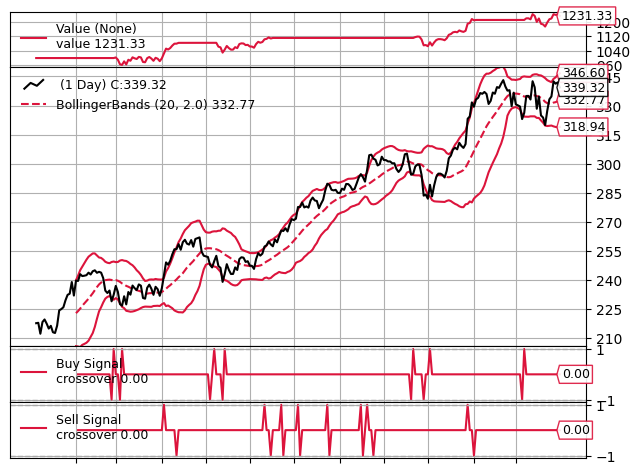

In [40]:
a = cerebro.plot(iplot=True, volume=False)
a[0][0]

### 7. Investigate different returns metrics

In [47]:
backtest_result[0].analyzers.returns.get_analysis()

OrderedDict([('rtot', 0.20809092377319252),
             ('ravg', 0.0008290475050724801),
             ('rnorm', 0.23234637147896484),
             ('rnorm100', 23.234637147896482)])

### 8. Extract daily portfolio returns and plot them

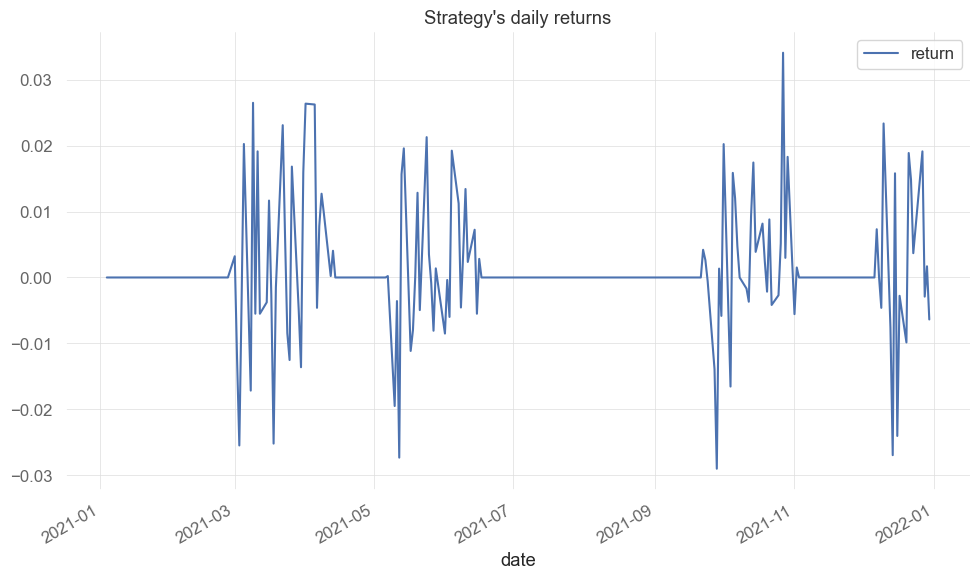

In [48]:
returns_dict = backtest_result[0].analyzers.time_return.get_analysis()
returns_df = (
    pd.DataFrame(list(returns_dict.items()), 
                 columns = ["date", "return"])
    .set_index("date")
)
returns_df.plot(title="Strategy's daily returns")

sns.despine()
plt.tight_layout()

## There's more

In [49]:
# Compare the performance of our strategy to a “buy-and-hold” strategy.

import quantstats as qs
import datetime as dt

qs.reports.metrics(returns_df,
                   benchmark=data_yf['Close'],
                   mode="basic")

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2021-01-04  2021-01-04
End Period          2021-12-30  2021-12-30
Risk-Free Rate      0.0%        0.0%
Time in Market      42.0%       100.0%

Cumulative Return   23.13%      55.87%
CAGR﹪              23.49%      56.84%

Sharpe              1.63        2.23
Prob. Sharpe Ratio  94.91%      98.7%
Sortino             2.64        3.56
Sortino/√2          1.86        2.52
Omega               1.51        1.51

Max Drawdown        -5.47%      -8.77%
Longest DD Days     99          54

Gain/Pain Ratio     0.51        0.45
Gain/Pain (1M)      4.03        6.06

Payoff Ratio        1.24        1.36
Profit Factor       1.51        1.45
Common Sense Ratio  2.45        1.66
CPC Index           1.03        1.05
Tail Ratio          1.63        1.14
Outlier Win Ratio   9.06        2.56
Outlier Loss Ratio  3.06        3.15

MTD                 1.82%       2.64%
3M                  14.93%      19.48%

# Backtesing a moving average crossover strategy using crypto data

## How to do it

### 1. Import the libraries

In [50]:
import backtrader as bt
import datetime
import pandas as pd
from backtrader_strategies.strategy_utils import *

### 2. Define the commission scheme allowing for fractional trades

In [52]:
class FractionalTradesCommission(bt.CommInfoBase):
    def getsize(self, price, cash):
        """Returns the fractional size"""
        return self.p.leverage * (cash / price)

### 3. Define the SMA crossover strategy

In [54]:
class SMACrossoverStrategy(bt.Strategy):
    params = (
        ("ma_fast",20),
        ("ma_slow", 50),
        ("target_perc", 0.7)
    )

    def __init__(self):
        # keep track of close price in the series
        self.data_close = self.datas[0].close

        # keep track of pending orders
        self.order = None

        # calculate the SMAs and get the crossover signal
        self.fast_ma = bt.indicators.SimpleMovingAverage(
            self.datas[0], 
            period=self.params.ma_fast
        )

        self.slow_ma = bt.indicators.SimpleMovingAverage(
            self.datas[0],
            period=self.params.ma_slow
        )

        self.ma_crossover = bt.indicators.CrossOver(
            self.fast_ma,
            self.slow_ma
        )

    def log(self, txt):
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f"{dt}, {txt}")

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order already submitted/accepted - no action required
            return
        
        # report executed order
        if order.status in [order.Completed]:

            direction = "b" if order.isbuy() else "s"
            log_str = get_action_log_string(
                dir=direction,
                action="e",
                price=order.executed.price,
                size=order.executed.size,
                cost=order.executed.value,
                commission=order.executed.comm
            )
            self.log(log_str)
        
        # report failed order
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Failed")
        
        # reset order - no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        self.log(get_result_log_string(gross=trade.pnl, net=trade.pnlcomm))

    def next(self):

        if self.order:
            return  # pending order execution. Waining in orderbook
        
        if not self.position:
            if self.ma_crossover > 0:
                self.order = self.order_target_percent(
                    target=self.params.target_perc
                )
                log_str = get_action_log_string("b", "c",
                                                price=self.data_close[0],
                                                size=self.position.size,
                                                cash=self.broker.get_cash(),
                                                open=self.data_open[0],
                                                close=self.data_close[0])
                self.log(log_str)
        else:
            if self.ma_crossover < 0:
                # sell order
                log_str = get_action_log_string("s", "c", self.data_close[0],
                                                self.position.size)
                self.log(log_str)
                self.order = (
                    self.order_target_percent(target=0.0)
                )

    def start(self):
        print(f"Initial Portfolio Value: {self.broker.get_value():.2f}")

    def stop(self):
        print(f"Final Portfolio Value: {self.broker.get_value():.2f}")

### 4. Download the BTC-USD data

In [73]:
data_btc_yf = yf.download('BTC-USD', start='2020-01-01', end='2021-12-31')
data = PandasData(dataname=data_btc_yf)

[*********************100%***********************]  1 of 1 completed


### 5. Set up the backtest

In [76]:
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=False)

cerebro.addstrategy(SMACrossoverStrategy)
cerebro.adddata(data)
cerebro.broker.setcash(10000.0)
cerebro.broker.addcommissioninfo(
    FractionalTradesCommission(commission=0.001)
)
cerebro.addobserver(MyBuySell)
cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(
    bt.analyzers.TimeReturn, _name="time_return"
)

### 6. Run the backtest

In [77]:
backtest_result = cerebro.run()

Initial Portfolio Value: 10000.00
2020-04-19, BUY CREATED - Price: 7189.42, Size: 0.00, Cash: 10000.00, Open: 7260.92, Close: 7189.42
2020-04-20, BUY EXECUTED - Price: 7186.87, Size: 0.97, Cost: 6997.52, Commission: 0.07
2020-06-29, SELL CREATED - Price: 9190.85, Size: 0.97
2020-06-30, SELL EXECUTED - Price: 9185.58, Size: -0.97, Cost: 6997.52, Commission: 0.09
2020-06-30, OPERATION RESULT - Gross: 1946.05, Net: 1945.89
2020-07-27, BUY CREATED - Price: 10990.87, Size: 0.00, Cash: 11945.89, Open: 9905.22, Close: 10990.87
2020-07-28, BUY EXECUTED - Price: 11017.46, Size: 0.76, Cost: 8382.35, Commission: 0.08
2020-09-09, SELL CREATED - Price: 10242.35, Size: 0.76
2020-09-10, SELL EXECUTED - Price: 10242.33, Size: -0.76, Cost: 8382.35, Commission: 0.08
2020-09-10, OPERATION RESULT - Gross: -589.74, Net: -589.90
2020-10-13, BUY CREATED - Price: 11425.90, Size: 0.00, Cash: 11355.98, Open: 11548.72, Close: 11425.90
2020-10-14, BUY EXECUTED - Price: 11429.05, Size: 0.70, Cost: 7951.38, Commiss

### 7. Plot the results

<IPython.core.display.Javascript object>

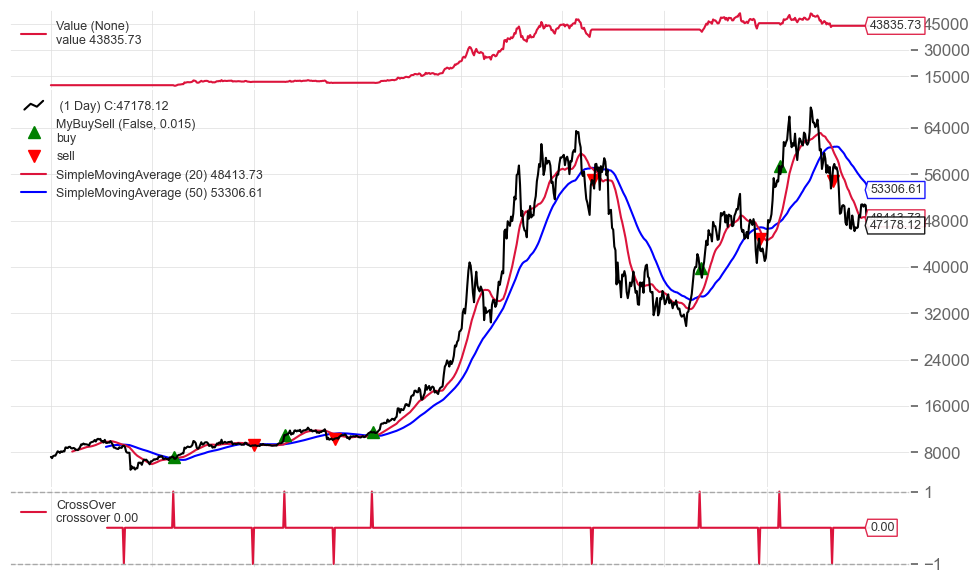

In [78]:
a = cerebro.plot(iplot=True, volume=False)
a[0][0]

In [79]:
# Get the strategy's performance as compared to buy-and-hold strategy

import quantstats as qs

# get the returns of the strategy as a DataFrame
returns_dict = backtest_result[0].analyzers.time_return.get_analysis()
returns_df = pd.DataFrame(list(returns_dict.items()), columns=['date', 'returns']).set_index('date')

# calculate the perf as compared to buy-and-hold
qs.reports.metrics(returns_df,
                   benchmark=data_btc_yf['Close'],
                   mode='basic')

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2020-01-01  2020-01-01
End Period          2021-12-30  2021-12-30
Risk-Free Rate      0.0%        0.0%
Time in Market      57.0%       100.0%

Cumulative Return   338.36%     555.24%
CAGR﹪              109.58%     156.31%

Sharpe              1.61        1.35
Prob. Sharpe Ratio  99.76%      98.6%
Sortino             2.65        1.97
Sortino/√2          1.87        1.4
Omega               1.47        1.47

Max Drawdown        -22.69%     -53.06%
Longest DD Days     147         188

Gain/Pain Ratio     0.47        0.29
Gain/Pain (1M)      6.58        2.47

Payoff Ratio        1.18        1.17
Profit Factor       1.47        1.29
Common Sense Ratio  1.96        1.59
CPC Index           0.96        0.81
Tail Ratio          1.33        1.23
Outlier Win Ratio   9.36        3.17
Outlier Loss Ratio  4.26        3.17

MTD                 0.0%        -17.24%
3M                  -3.31%      1

## There's more

In [80]:
# 1. Define the same strategy manually calculating the amount of BTC to buy

class SMACrossoverStrategyAlt(bt.Strategy):
    params = (
        ('ma_fast', 20),
        ('ma_slow', 50),
        ('target_perc', 0.7)
    )

    def __init__(self):
        # keep track of close price in the series
        self.data_close = self.datas[0].close
        
        # keep track of pending orders
        self.order = None

        # calculate the SMAs and get the crossover signal        
        self.fast_ma = bt.indicators.MovingAverageSimple(self.datas[0], 
                       period=self.params.ma_fast)
        self.slow_ma = bt.indicators.MovingAverageSimple(self.datas[0], 
                       period=self.params.ma_slow)
        self.ma_crossover = bt.indicators.CrossOver(self.fast_ma, 
                                                    self.slow_ma)
        
    def log(self, txt):
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f"{dt}: {txt}")

    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order already submitted/accepted - no action required
            return

        # report executed order
        if order.status in [order.Completed]:

            direction = "b" if order.isbuy() else "s"
            log_str = get_action_log_string(
                    dir=direction, 
                    action="e", 
                    price=order.executed.price,
                    size=order.executed.size,
                    cost=order.executed.value, 
                    commission=order.executed.comm
                )
            self.log(log_str)

        # report failed order
        elif order.status in [order.Canceled, order.Margin, 
                              order.Rejected]:
            self.log("Order Failed")

        # reset order -> no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log(get_result_log_string(gross=trade.pnl, net=trade.pnlcomm))

    def next(self):

        if self.order:
            return  # pending order execution. Waiting in orderbook

        if not self.position:
            if self.ma_crossover > 0:
                size = self.broker.getcash() / self.datas[0].close * self.params.target_perc
                log_str = get_action_log_string("b", "c", 
                                                price=self.data_close[0], 
                                                size=size,
                                                cash=self.broker.getcash(),
                                                open=self.data_open[0],
                                                close=self.data_close[0])
                self.log(log_str)
                self.order = self.buy(size=size)
        else:
            if self.ma_crossover < 0:
                # sell order
                log_str = get_action_log_string("s", "c", self.data_close[0], 
                                                self.position.size)
                self.log(log_str)
                # self.order = self.sell(size=self.position.size)
                self.order = self.order_target_percent(target=0)

    def start(self):
        print(f"Initial Portfolio Value: {self.broker.get_value():.2f}")

    def stop(self):
        print(f"Final Portfolio Value: {self.broker.get_value():.2f}")

In [81]:
# 2. Set up the backtest, this time without the fractional commission scheme
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)

cerebro.addstrategy(SMACrossoverStrategyAlt)
cerebro.adddata(data)
cerebro.broker.setcash(10000.0)
cerebro.broker.setcommission(commission=0.001)
cerebro.addobserver(MyBuySell)
cerebro.addobserver(bt.observers.Value)

In [82]:
# 3. Run the backtest
backtest_result = cerebro.run()

Initial Portfolio Value: 10000.00
2020-04-19: BUY CREATED - Price: 7189.42, Size: 0.97, Cash: 10000.00, Open: 7260.92, Close: 7189.42
2020-04-20: BUY EXECUTED - Price: 7186.87, Size: 0.97, Cost: 6997.52, Commission: 7.00
2020-06-29: SELL CREATED - Price: 9190.85, Size: 0.97
2020-06-30: SELL EXECUTED - Price: 9185.58, Size: -0.97, Cost: 6997.52, Commission: 8.94
2020-06-30: OPERATION RESULT - Gross: 1946.05, Net: 1930.11
2020-07-27: BUY CREATED - Price: 10990.87, Size: 0.76, Cash: 11930.11, Open: 9905.22, Close: 10990.87
2020-07-28: BUY EXECUTED - Price: 11017.46, Size: 0.76, Cost: 8371.28, Commission: 8.37
2020-09-09: SELL CREATED - Price: 10242.35, Size: 0.76
2020-09-10: SELL EXECUTED - Price: 10242.33, Size: -0.76, Cost: 8371.28, Commission: 7.78
2020-09-10: OPERATION RESULT - Gross: -588.96, Net: -605.11
2020-10-13: BUY CREATED - Price: 11425.90, Size: 0.69, Cash: 11324.99, Open: 11548.72, Close: 11425.90
2020-10-14: BUY EXECUTED - Price: 11429.05, Size: 0.69, Cost: 7929.68, Commiss

# Backtesting a mean-variance portfolio optimizaion

## Getting ready

In [83]:
import backtrader as bt

class FractionalTradesCommission(bt.CommissionInfo):
    def getsize(self, price, cash):
        """Returns the fractional size"""
        return self.p.leverage * (cash / price)

## How to do it

### 1. Import the libraries 

In [84]:
from datetime import datetime
import backtrader as bt
import pandas as pd
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from backtrader_strategies.strategy_utils import *

## 2. Define the strategy

In [104]:
class MeanVariancePortfStrategy(bt.Strategy):
    params = (("n_periods", 252), )

    def __init__(self):
        # track number of days
        self.day_counter = 0

    def log(self, txt):
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f"{dt}, {txt}")

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order already submitted/accepted - no action required
            return
        
        # report executed order
        if order.status in [order.Completed]:

            direction = "b" if order.isbuy() else "s"
            log_str = get_action_log_string(
                asset=order.data._name,
                dir=direction,
                action="e",
                price=order.executed.price,
                size=order.executed.size,
                cost=order.executed.value,
                commission=order.executed.comm
            )
            self.log(log_str)
        
        # report failed order
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log(f"Order Failed: {order.data._name}")
        
        # reset order -> no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        self.log(get_result_log_string(gross=trade.pnl, net=trade.pnlcomm))

    def next(self):

        # check if we have enough data points
        self.day_counter += 1
        if self.day_counter < self.params.n_periods:
            return
        
        # check if the date is a Friday
        today = self.datas[0].datetime.date()
        if today.weekday() != 4:
            return
        
        # find and print the current allocation
        current_portf = {}
        for data in self.datas:
            current_portf[data._name] = (
                self.positions[data].size * data.close[0]
            )
        portf_df = pd.DataFrame(current_portf, index=[0])
        print(f"Current allocation as of {today}")
        print(portf_df / portf_df.sum(axis=1).squeeze())

        # extract the past price data for each asset
        price_dict = {}
        for data in self.datas:
            price_dict[data._name] = data.close.get(0, self.params.n_periods+1)
        price_df = pd.DataFrame(price_dict)

        # find the optimal portfolio weights
        mu = mean_historical_return(price_df)
        S = CovarianceShrinkage(price_df).ledoit_wolf()
        ef = EfficientFrontier(mu, S)
        weights = ef.max_sharpe(risk_free_rate=0.0)
        print(f"Optimal allocation identified on {today}")
        print(pd.DataFrame(ef.clean_weights(), index=[0]))

        # create orders
        for allocation in list(ef.clean_weights().items()):
            self.order_target_percent(data=allocation[0], target=allocation[1])

    def start(self):
        print(f"Initial Portfolio Value: {self.broker.getvalue():,.2f}")

    def stop(self):
        print(f"Final Portfolio Value: {self.broker.getvalue():,.2f}")

### 3. Download the prices of the FAANG stocks and store the data feeds in a list

In [98]:
TICKERS = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]

data_list = []

for ticker in TICKERS:
    data_yf = yf.download(ticker, "2020-01-01", "2021-12-31")
    data = PandasData(dataname=data_yf)
    data_list.append(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 4. Setup the backtest

In [105]:
cerebro = bt.Cerebro(stdstats=False)

cerebro.addstrategy(MeanVariancePortfStrategy)

for ind, ticker in enumerate(TICKERS):
    cerebro.adddata(data_list[ind], name=ticker)

cerebro.broker.setcash(1000.0)
cerebro.broker.addcommissioninfo(
    FractionalTradesCommission(commission=0)
)
cerebro.addobserver(MyBuySell)
cerebro.addobserver(bt.observers.Value)

### 5. Run the backtest

In [106]:
backtest_result = cerebro.run()

Initial Portfolio Value: 1,000.00
Current allocation as of 2021-01-08
   META  AMZN  AAPL  NFLX  GOOG
0   NaN   NaN   NaN   NaN   NaN
Optimal allocation identified on 2021-01-08
   META     AMZN     AAPL  NFLX  GOOG
0   0.0  0.71849  0.28151   0.0   0.0
2021-01-11, BUY EXECUTED - Price: 157.40, Size: 4.51, Asset: AMZN, Cost: 710.66, Commission: 0.00
2021-01-11, BUY EXECUTED - Price: 129.19, Size: 2.13, Asset: AAPL, Cost: 275.41, Commission: 0.00
Current allocation as of 2021-01-15
   META      AMZN      AAPL  NFLX  GOOG
0   0.0  0.721099  0.278901   0.0   0.0
Optimal allocation identified on 2021-01-15
   META    AMZN    AAPL  NFLX  GOOG
0   0.0  0.8445  0.1555   0.0   0.0
2021-01-19, Order Failed: AMZN
2021-01-19, SELL EXECUTED - Price: 127.78, Size: -0.93, Asset: AAPL, Cost: 119.66, Commission: 0.00
Current allocation as of 2021-01-22
   META      AMZN      AAPL  NFLX  GOOG
0   0.0  0.815929  0.184071   0.0   0.0
Optimal allocation identified on 2021-01-22
   META     AMZN     AAPL  